🌐 What is a LangGraph?
LangGraph is a library built on top of LangChain that lets you create graphs to define how different steps (or nodes) in a process connect. It's used to design systems where data or messages flow from one part to another — like a flowchart.

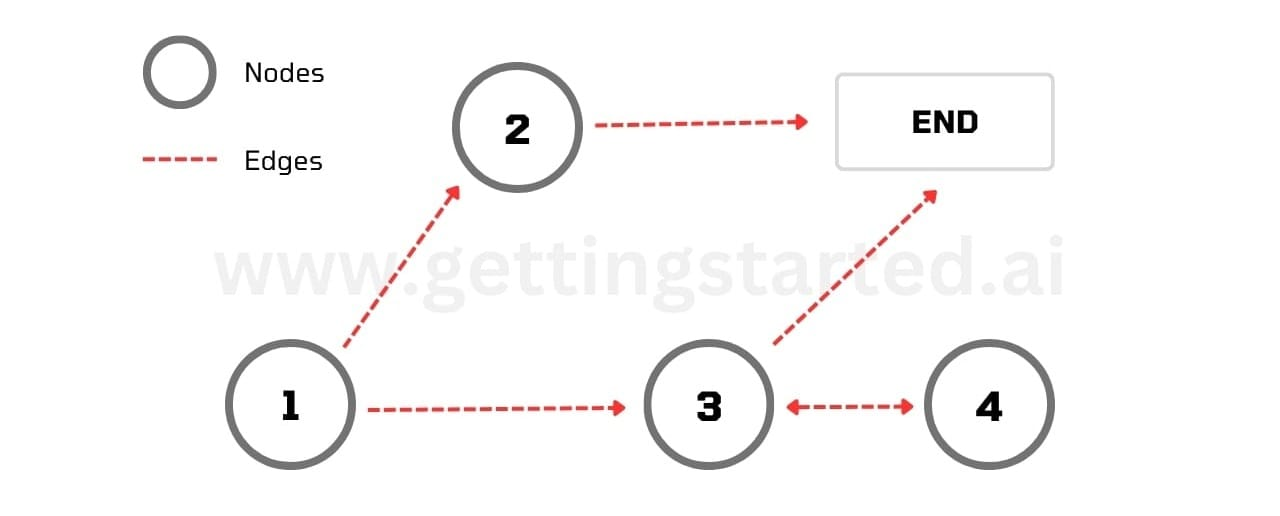



In [2]:
def function1(input1):
    return input1 + " this is from first function"


In [3]:
def function2(input2):
    return input2 + " charan this is from second function"

In [4]:
def function3(input3):
    pass

In [5]:
function1("sai")

'sai this is from first function'

In [6]:
function2("charan")

'charan charan this is from second function'

In [7]:
from langgraph.graph import Graph

In [8]:
workflow1=Graph()

In [9]:
workflow1.add_node("fun1",function1) # creating nodes in workflow that is function 1 as node 1

In [10]:
workflow1.add_node("fun2",function2) # creating nodes in workflow that is function 2 as node 2

In [11]:
workflow1.add_edge("fun1","fun2")

In [12]:
workflow1.set_entry_point("fun1")

In [13]:
workflow1.set_finish_point("fun2")

In [14]:
app = workflow1.compile()

In [15]:
app.get_graph()

Graph(nodes={'fun1': Node(id='fun1', name='fun1', data=fun1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'fun2': Node(id='fun2', name='fun2', data=fun2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='fun1', data=None, conditional=False), Edge(source='fun1', target='fun2', data=None, conditional=False), Edge(source='fun2', target='__end__', data=None, conditional=False)])

Displaying simple graph


In [16]:
from IPython.display import Image,display

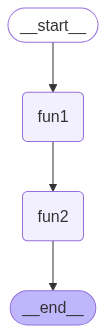

In [17]:
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
app.invoke("hi iam sai")

'hi iam sai this is from first function charan this is from second function'

📦 Key Components of a Simple LangGraph

Nodes: These are the steps in your graph. Each node does a specific job — like calling an LLM, retrieving a document, or processing text.

Edges: These are the paths or connections between nodes. They define what happens next after a node finishes its task.

Graph: A full graph ties everything together — it shows how all the nodes and edges connect.

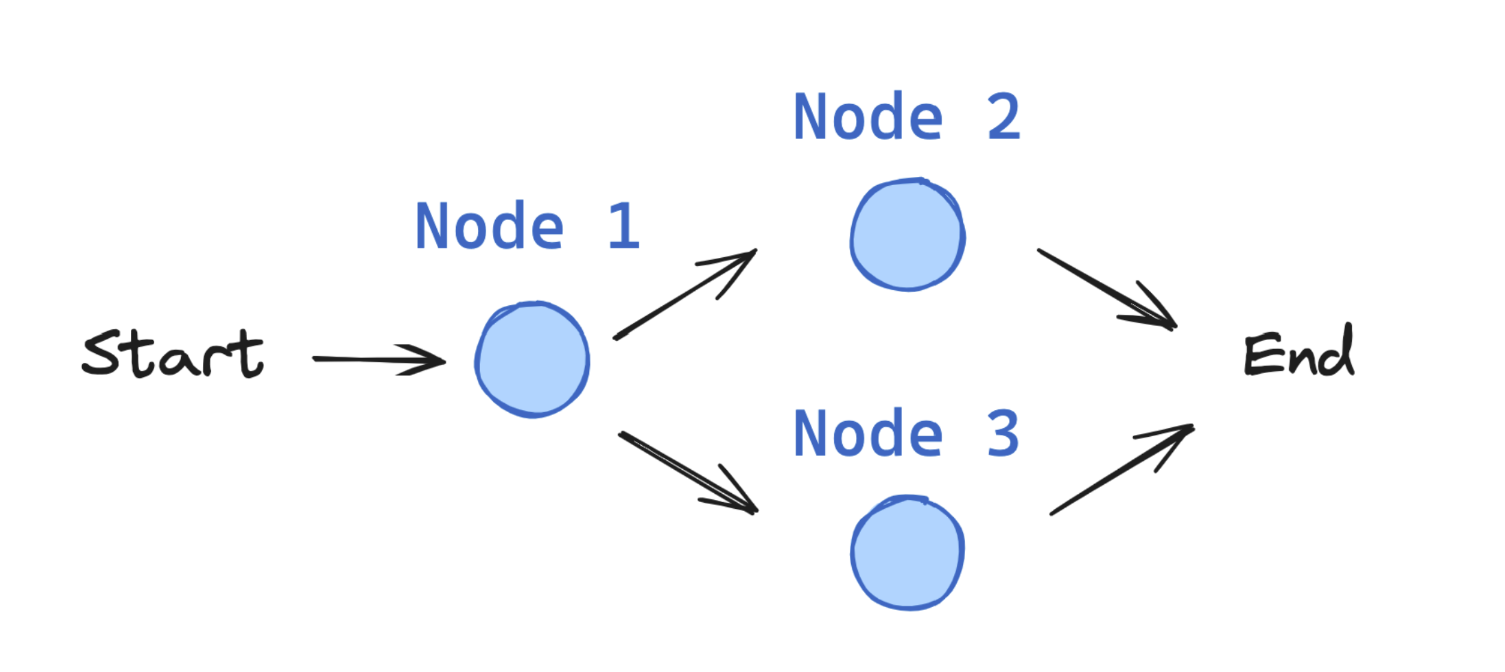


CREATING A SECOND WORKFLOW

In [19]:
import os
os.environ["GOOGLE_API_KEY"] = "YOUR_GOOGLE_API_KEY_HERE" ## enter your google studio api key inside the quotes

In [20]:
from langchain_google_genai import ChatGoogleGenerativeAI
model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')


In [21]:
model.invoke("hi who are you").content

ChatGoogleGenerativeAIError: Invalid argument provided to Gemini: 400 API key not valid. Please pass a valid API key. [reason: "API_KEY_INVALID"
domain: "googleapis.com"
metadata {
  key: "service"
  value: "generativelanguage.googleapis.com"
}
, locale: "en-US"
message: "API key not valid. Please pass a valid API key."
]

In [ ]:
def llm(input):
   from langchain_google_genai import ChatGoogleGenerativeAI
   model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
   output=model.invoke(input)
   return output.content


In [ ]:
def tokencounter(input):
    token = input.split()
    token_number = len(token)
    return f"total number of tokens generated in answer is {token_number}"

In [ ]:
workflow2=Graph()

In [ ]:
workflow2.add_node("myllm", llm)

In [ ]:
workflow2.add_node("llm output token counter",tokencounter)

In [ ]:
workflow2.add_edge("myllm","llm output token counter")

In [ ]:
workflow2.set_entry_point("myllm")

In [ ]:
workflow2.set_finish_point("llm output token counter")

In [ ]:
app=workflow2.compile()

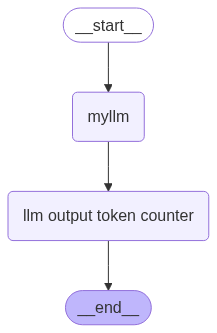

In [ ]:
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
app.invoke("can you tell me about india's capital?")

'total number of tokens generated in answer is 120'

In [ ]:
app.invoke("can you tell me about tata steel?")

'total number of tokens generated in answer is 418'

In [ ]:
for output in app.stream("can you tell me about tata steel?"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from myllm
_______
Tata Steel is a multinational steel manufacturing and distribution company headquartered in Mumbai, India.  It's a subsidiary of Tata Sons, a major Indian conglomerate.  Here's a summary of key aspects:

**History and Ownership:**  Founded in 1907 as Tata Iron and Steel Company, it's one of the oldest and largest steel companies in India.  Its history is intertwined with the industrial development of India.  It remains under the umbrella of Tata Sons, a privately held company with significant influence in various sectors.

**Global Presence:**  Tata Steel is a global player with operations spanning multiple countries, including India, the UK, Netherlands, and other locations.  Its acquisition of Corus in 2007 significantly expanded its international reach.

**Products and Services:**  The company produces a wide range of steel products, serving diverse industries like construction, automotive, energy, and packaging.  This includes flat products (sheets

🧱 Example: Simple LangGraph for Summarizing Text
Imagine a graph that takes text and returns a summary:

Nodes:
input_node: Receives user text.

summarize_node: Uses an LLM to summarize the text.

output_node: Returns the summary to the user.

Edges:
input_node → summarize_node

summarize_node → output_node
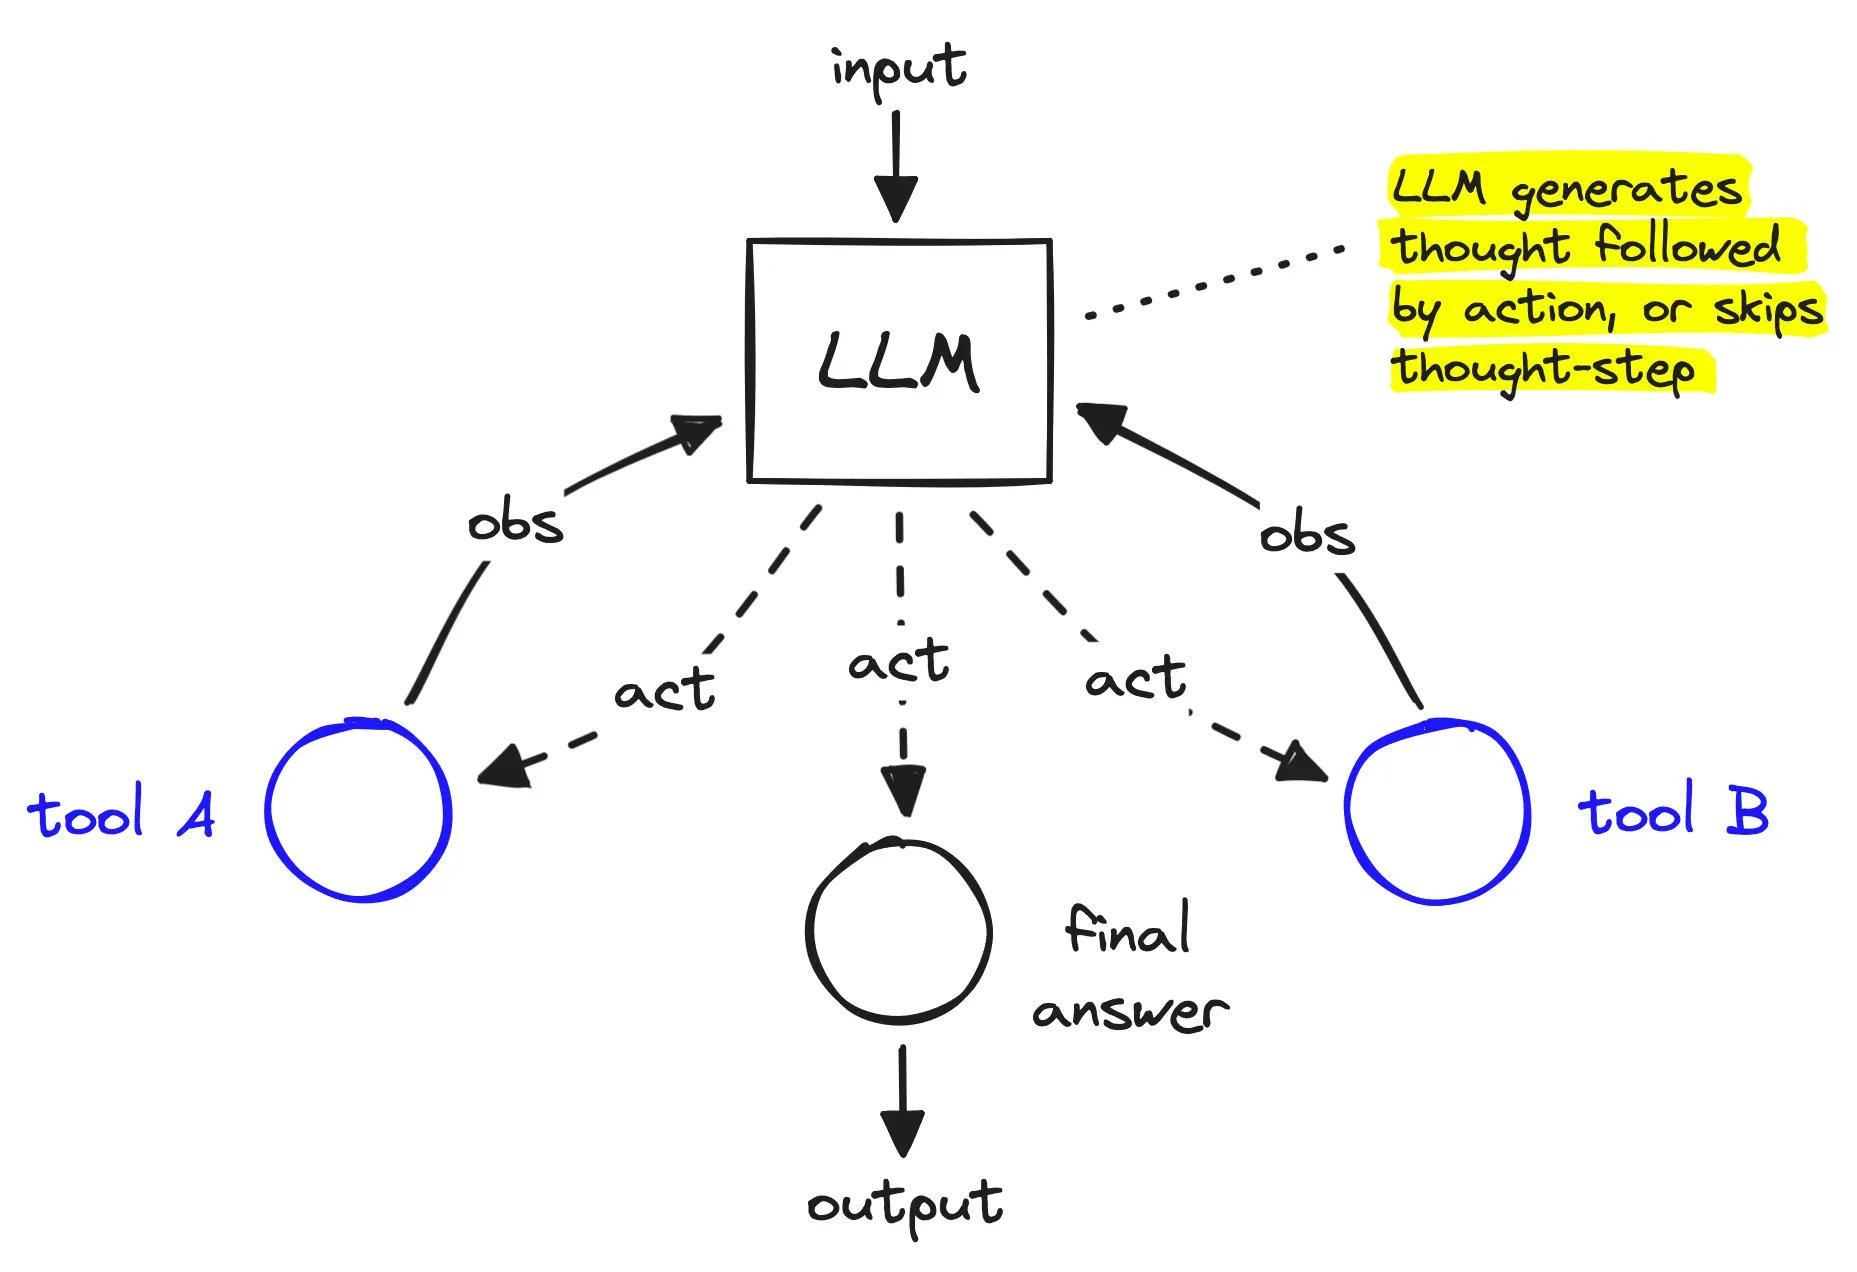

CREATING A THIRD WORKFLOW 

In [27]:
def nodea(state: dict) -> dict:
    if not isinstance(state, dict) or "input" not in state:
        raise ValueError("State must be a dictionary with an 'input' key.")
    modified = state["input"].upper()
    return {**state, "input": modified}


In [24]:
def nodeb(state: dict) -> dict:
    response = f"You said: {state['input']}"
    return {**state, "output": response}

In [25]:
workflow3=Graph()

In [28]:
workflow3.add_node("Node a",nodea)

In [29]:
workflow3.add_node("Node b",nodeb)

In [30]:
workflow3.add_edge("Node a","Node b")

In [31]:
workflow3.set_entry_point("Node a")

In [32]:
workflow3.set_finish_point("Node b")

In [33]:
app=workflow3.compile()

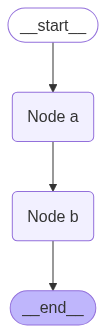

In [34]:
display(Image(app.get_graph().draw_mermaid_png()))

In [35]:
app.invoke({"input": "hai hello what are you doing?"})


{'input': 'HAI HELLO WHAT ARE YOU DOING?',
 'output': 'You said: HAI HELLO WHAT ARE YOU DOING?'}

In [36]:
app.invoke({"input": "hai hello what you can do?"})

{'input': 'HAI HELLO WHAT YOU CAN DO?',
 'output': 'You said: HAI HELLO WHAT YOU CAN DO?'}